In [38]:
import numpy as np                    # linear algebra
import pandas as pd                   # database manipulation
import matplotlib.pyplot as plt       # plotting libraries
import seaborn as sns                 # nice graphs and plots
import warnings
warnings.filterwarnings('ignore')

In [39]:
train = pd.read_csv('train_V2.csv')
print('There are {} rows and {} columns in our dataset.'.format(train.shape[0],train.shape[1]))

There are 4446966 rows and 29 columns in our dataset.


In [40]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

##### groupId - Players team ID
##### matchId - Match ID
##### assists - Number of assisted kills. The killed is actually scored for the another teammate.
##### boosts - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
##### damageDealt - Damage dealt to the enemy
##### DBNOs - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
##### headshotKills - Number of enemies killed with a headshot
##### heals - Number of healing items used by a player. These are for example: bandages, first-aid kits
##### killPlace - Ranking in a match based on kills.
##### killPoints - Ranking in a match based on kills points.
##### kills - Number of enemy players killed.
##### killStreaks - Max number of enemy players killed in a short amount of time.
##### longestKill - Longest distance between player and killed enemy.
##### matchDuration - Duration of a mach in seconds.
##### matchType - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
##### maxPlace - The worst place we in the match.
##### numGroups - Number of groups (teams) in the match.
##### revives - Number of times this player revived teammates.
##### rideDistance - Total distance traveled in vehicles measured in meters.
##### roadKills - Number of kills from a car, bike, boat, etc.
##### swimDistance - Total distance traveled by swimming (in meters).
##### teamKills - Number teammate kills (due to friendly fire).
##### vehicleDestroys - Number of vehicles destroyed.
##### walkDistance - Total distance traveled on foot measured (in meters).
##### weaponsAcquired - Number of weapons picked up.
##### winPoints - Ranking in a match based on won matches.
##### winPlacePerc - Normalised placement (rank). The 1st place is 1 and the last one is 0.

In [42]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [43]:
# We have 1 Nan in our target variable
train[train['winPlacePerc'].isna() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [44]:
# Lets have a look at all the players in this match
matchId = '224a123c53e008'
data = train[train['matchId'] == matchId]
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [45]:
# Remove the data where the target variable is NULL
print ('length of the training set before: ',len(train))
train = train[train['winPlacePerc'].isna() != True]
print ('length of the training set after: ',len(train))

length of the training set before:  4446966
length of the training set after:  4446965


In [46]:
# Number of enemy players that were killed by each player
print('The average person kills {:.4f} players'.format(train['kills'].mean()))
print('50% of people have ',train['kills'].quantile(0.50),' kills or less')
print('75% of people have ',train['kills'].quantile(0.75),' kills or less')
print('99% of people have ',train['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', train['kills'].max())

The average person kills 0.9248 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


In [47]:
# Number of enemy players killed while in a vehicle
print('The average person kills {:.4f} players from a vehicle'.format(train['roadKills'].mean()))
print('50% of people have ',train['roadKills'].quantile(0.50),' kills or less from a vehicle')
print('75% of people have ',train['roadKills'].quantile(0.75),' kills or less from a vehicle')
print('99% of people have ',train['roadKills'].quantile(0.99),' kills or less from a vehicle')
print('While the most kills recorded from a vehicle in the data is', train['roadKills'].max())

The average person kills 0.0035 players from a vehicle
50% of people have  0.0  kills or less from a vehicle
75% of people have  0.0  kills or less from a vehicle
99% of people have  0.0  kills or less from a vehicle
While the most kills recorded from a vehicle in the data is 18


In [48]:
# Number of Head shot kills
print('The average person make {:.4f} head shots'.format(train['headshotKills'].mean()))
print('75% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.75)))
print('99% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.99)))
print('while the most head shots recorded in the data is', train['headshotKills'].max())

The average person make 0.2268 head shots
75% of people make {:.2f} head shots  0.0
99% of people make {:.2f} head shots  3.0
while the most head shots recorded in the data is 64


In [49]:
print('The average person walks/runs {:.2f} m'.format(train['walkDistance'].mean()))
print('25% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.25)))
print('50% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.50)))
print('75% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.75)))
print('99% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.99)))
print('The longest distance travelled by feet in the data is {:.2f} m'.format(train['walkDistance'].max()))

The average person walks/runs 1154.22 m
25% of people have walked/ran 155.10 m or less
50% of people have walked/ran 685.60 m or less
75% of people have walked/ran 1976.00 m or less
99% of people have walked/ran 4396.00 m or less
The longest distance travelled by feet in the data is 25780.00 m


In [50]:
# Distance in metres travelled through water
print('The average person drove {:.2f} m'.format(train['swimDistance'].mean()))
print('75% of people have drove {:.2f} m or less'.format(train['swimDistance'].quantile(0.75)))
print('99% of people have drove {:.2f} m or less'.format(train['swimDistance'].quantile(0.99)))
print('The longest distance travelled by vehicle in the data is {:.2f} m'.format(train['swimDistance'].max()))

The average person drove 4.51 m
75% of people have drove 0.00 m or less
99% of people have drove 123.00 m or less
The longest distance travelled by vehicle in the data is 3823.00 m


In [51]:
data = train[['winPlacePerc']].copy()
data['totalDistance'] = train['walkDistance'] + train['rideDistance'] + train['swimDistance']

print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))

The average person travelled 1764.84 m
25% of people have travelled 158.10 m or less
50% of people have travelled 788.20 m or less
75% of people have travelled 2728.46 m or less
99% of people have travelled 9309.00 m or less
The longest distance travelled in the data is 41270.10 m


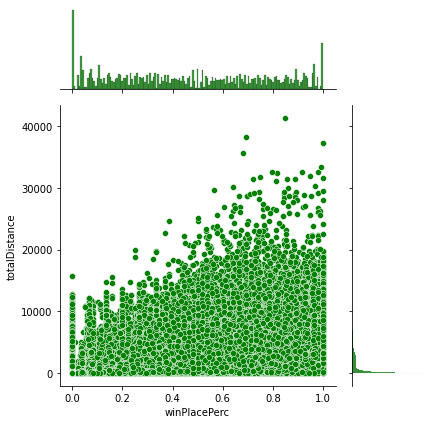

In [52]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='g')
plt.show()

In [53]:
data = train.copy()
print('The average person lasts {:.2f} seconds'.format(data['matchDuration'].mean()))
print('The shortest game lasted {:.1f} seconds'.format(data['matchDuration'].min()))
print('25% of people last {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.25)))
print('50% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.50)))
print('75% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.75)))
print('99% of people have {:.1f} secondsor less'.format(data['matchDuration'].quantile(0.99)))
print('The longest game lasted {:.1f} seconds'.format(data['matchDuration'].max()))

The average person lasts 1579.51 seconds
The shortest game lasted 133.0 seconds
25% of people last 1367.0 seconds or less
50% of people have 1438.0 seconds or less
75% of people have 1851.0 seconds or less
99% of people have 2052.0 secondsor less
The longest game lasted 2237.0 seconds


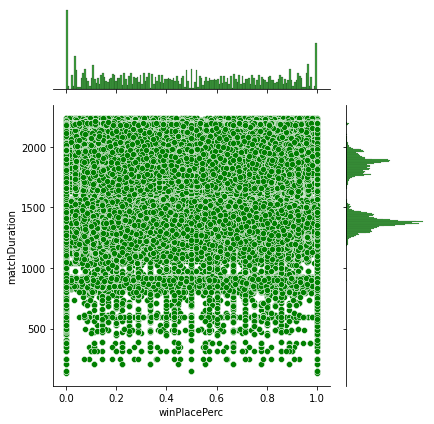

In [54]:
sns.jointplot(x='winPlacePerc', y='matchDuration', data=data, ratio=3, color='g')
plt.show()

In [55]:
data.corr()['winPlacePerc']['matchDuration']

-0.0051713142354407144

In [56]:
#### Different match types
modes = set(train['matchType'])
print (modes)

{'normal-solo', 'normal-duo-fpp', 'flaretpp', 'normal-solo-fpp', 'normal-squad-fpp', 'crashtpp', 'normal-duo', 'flarefpp', 'normal-squad', 'squad', 'crashfpp', 'duo-fpp', 'solo', 'squad-fpp', 'duo', 'solo-fpp'}


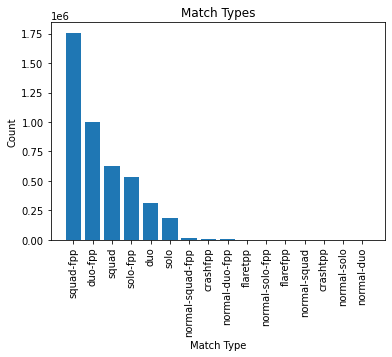

In [57]:

import matplotlib.pyplot as plt

# Get the count of each match type
m_types = train.loc[:, 'matchType'].value_counts().to_frame().reset_index()
m_types.columns = ['Type', 'Count']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(m_types['Type'], m_types['Count'])
ax.set_title('Match Types')
ax.set_xlabel('Match Type')
ax.set_ylabel('Count')
plt.xticks(rotation=90)

plt.show()


In [58]:
m_types2 = train.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,2400402
duo,1315970
solo,720712


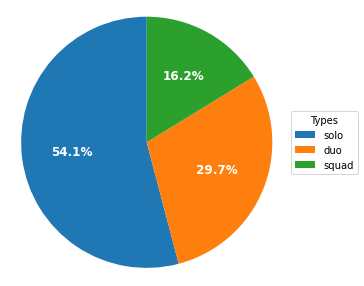

In [59]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['solo','duo','squad']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

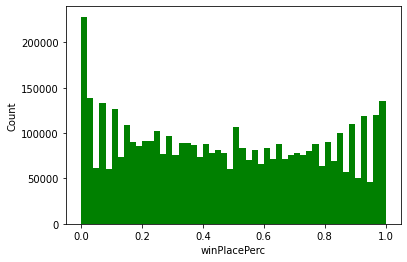

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the histogram
fig, ax = plt.subplots()
ax.hist(train['winPlacePerc'], bins=50, color='green')
ax.set_xlabel('winPlacePerc')
ax.set_ylabel('Count')
plt.show()


In [61]:
import pandas as pd

# Load the data
data = pd.read_csv("kill_match_stats_final_0.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killed_by          object 
 1   killer_name        object 
 2   killer_placement   float64
 3   killer_position_x  float64
 4   killer_position_y  float64
 5   map                object 
 6   match_id           object 
 7   time               int64  
 8   victim_name        object 
 9   victim_placement   float64
 10  victim_position_x  float64
 11  victim_position_y  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.2+ GB


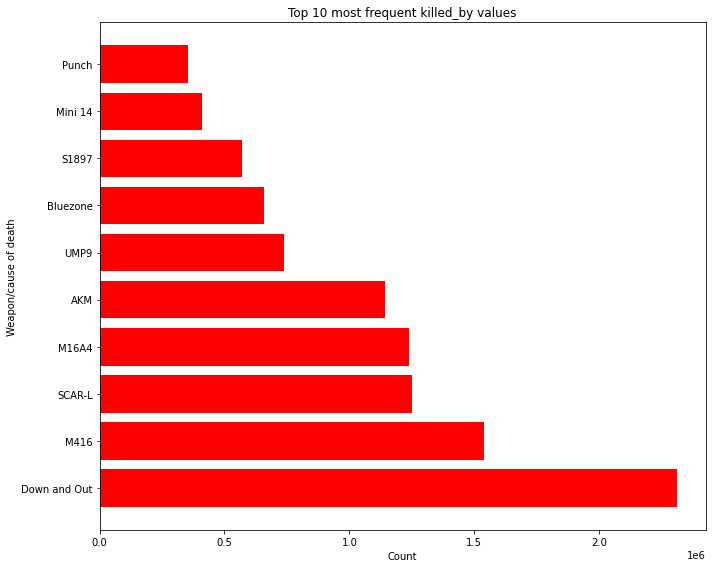

In [62]:
# Get the value counts of the "killed_by" column and sort them in descending order
killed_by_counts = data['killed_by'].value_counts().sort_values(ascending=False)

# Keep only the top 20 most frequent values
top_killed_by = killed_by_counts[:10]
# Create a bar chart of the top killed_by values
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_killed_by.index, top_killed_by.values,color='red')
ax.set_title('Top 10 most frequent killed_by values')
ax.set_xlabel('Count')
ax.set_ylabel('Weapon/cause of death')
plt.tight_layout()
plt.show()


In [63]:
def weapons_time(data, min_time, max_time=max(list(data["time"]))):
    time_range = data[(data["time"] >= min_time) & (data["time"] <= max_time)]
    grouped_time = time_range.groupby("killed_by").size().sort_values(ascending=False)
    top_10 = grouped_time.head(10)
    deaths = sum(list(grouped_time.values))
    
    sns.barplot(x=top_10.index.values, y=top_10.values, color="blue")
    plt.title(f"Top 10 Weapons ({min_time} to {max_time} sec.)")
    plt.xticks(rotation=90)
    plt.show()

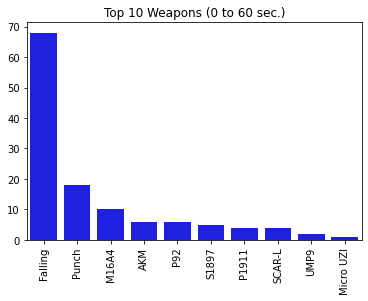

In [64]:

weapons_time(data, 0, 60)

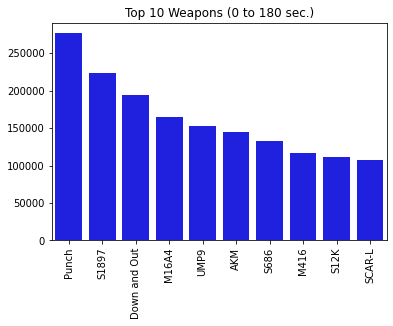

In [65]:
weapons_time(data, 0, 180)

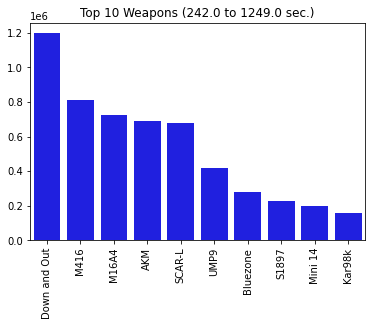

In [66]:
weapons_time(data, np.quantile(data["time"], 0.25), np.quantile(data["time"], 0.75))

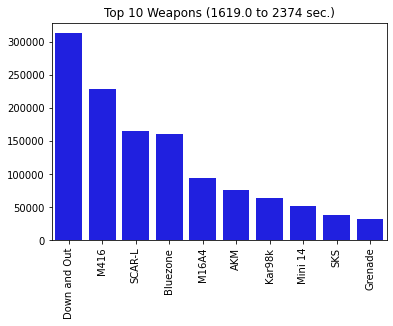

In [67]:
weapons_time(data, np.quantile(data["time"], 0.9))

#### At the start of the game, players often use their fists or weapons like Punch and M16A4. 
#### During the middle of the game, popular weapons include M416, M16A4, AKM, and SCAR-L. 
#### Towards the end of the game, the most common weapons used are M416 and SCAR-L. 
#### Based on this data, it can be inferred that the M416 and SCAR-L are among the best weapons in the game.

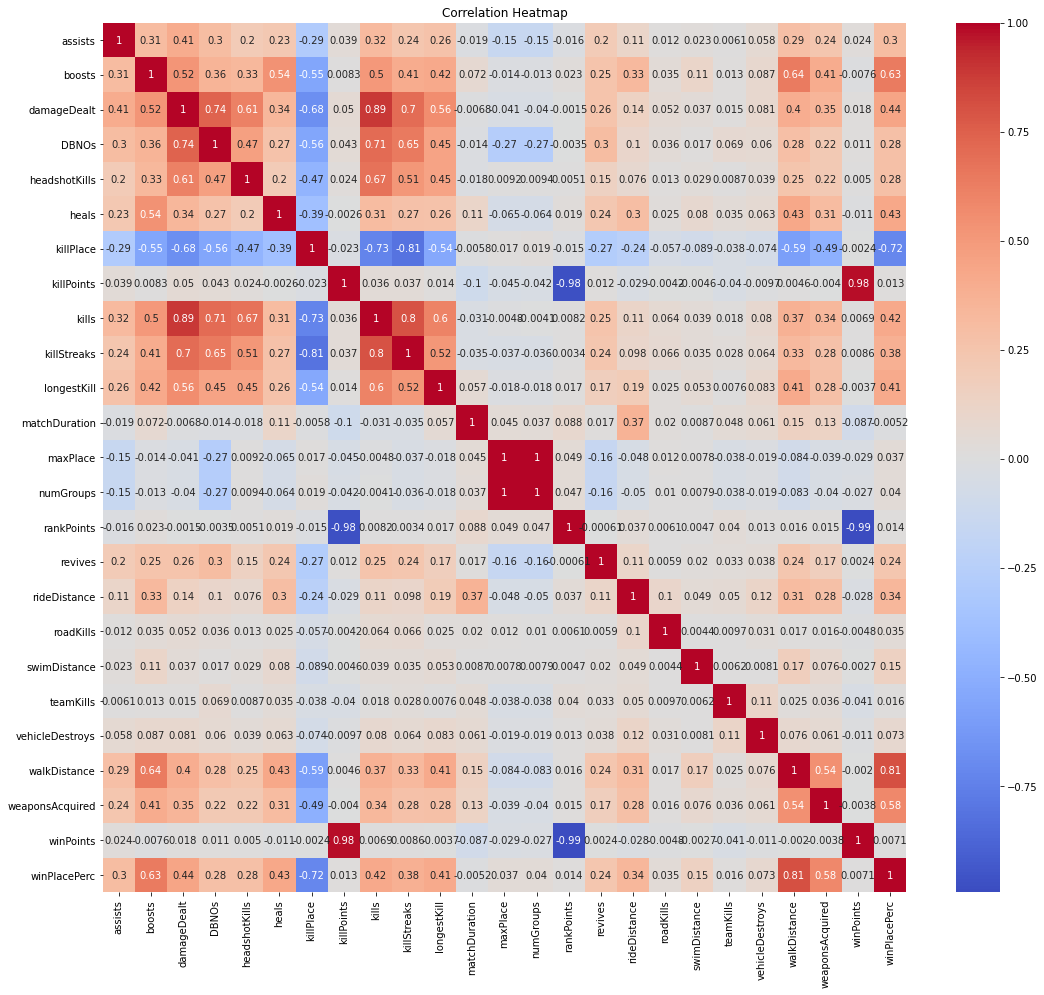

In [68]:
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = train.corr()

# Plot heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and test sets
train_data, test_data = train_test_split(train, test_size=0.1)

# Select features to use in the model
features = ['assists', 'boosts', 'damageDealt', 'headshotKills', 'killStreaks', 'kills', 'revives', 'walkDistance']

# Train the model using random forest regression
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(train_data[features], train_data['winPlacePerc'])

# Evaluate the model on the test set
predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data['winPlacePerc'], predictions)
print("Mean squared error:", mse)


Mean squared error: 0.024032441605316302


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

train = train.dropna()
# Encode categorical variables
train = pd.get_dummies(train, columns=['matchType'])

# Split the data into training and testing sets
X = train.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1)
y = train['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbm = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)
gbm.fit(X_train, y_train)

# Evaluate the model
y_pred = gbm.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
print(f"Mean squared Error: {mae}")


Mean squared Error: 0.008449452956795814
